In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from datetime import datetime


C:\Users\benna435\AppData\Roaming\Python\Python312\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\benna435\AppData\Roaming\Python\Python312\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\benna435\AppData\Roaming\Python\Python312\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto

In [2]:
import yfinance as yf
import pandas as pd
import time

# ============================================
# 1. ORIGINAL TICKERS (YOUR DOWNLOADED LIST)
# ============================================

tickers = [
"MMM","AOS","ABT","ABBV","ACN","ADBE","AMD","AES","AFL","A","AAP","AMT","AWK",
"AMP","ABC","AME","AMGN","APH","ADI","ANSS","ANTM","AON","APA","AAPL","AMAT",
"APTV","ADM","ANET","AJG","AIZ","T","ATO","ADSK","AZO","AVB","AVY","BKR","BLL",
"BAC","BK","BAX","BDX","BRO","BBWI","BR","BMY","AVGO","BRK-B","CDNS","CZR",
"CPB","COF","CAH","KMX","CCL","CARR","CTLT","CAT","CBOE","CBRE","CDW","CE","CNC",
"CNP","CDAY","CF","CRL","SCHW","CHTR","CVX","CMG","CB","CHD","CI","CINF","CTAS",
"CSCO","C","CFG","CTXS","CLX","CME","CMS","KO","CTSH","CL","CMCSA","CMA","CAG",
"COP","ED","STZ","CEG","COO","CPRT","GLW","CTVA","CSX","CMI","CVS","DHI","DHR",
"DRI","DVA","DE","DAL","XRAY","DVN","DXCM","FANG","DLR","DFS","DIS","DG","DLTR",
"D","DPZ","DOV","DOW","DTE","DUK","DRE","DD","DXC","EMN","ETN","EBAY","ECL",
"EIX","EW","EA","EMR","ENPH","ETR","EOG","EFX","EQIX","EQR","ESS","EL","ETSY",
"RE","EXC","EXPE","EXPD","EXR","XOM","FFIV","FDS","FIS","FITB","FE","FRC","FISV",
"FLT","FMC","F","FTNT","FTV","FBHS","FOXA","FOX","BEN","FCX","GRMN","IT","GNRC",
"GD","GE","GIS","GM","GPC","GILD","GPN","GL","GS","HAL","HIG","HAS","HCA","PEAK",
"HSIC","HSY","HES","HPE","HLT","HOLX","HD","HON","HRL","HST","HWM","HPQ","HUM",
"HBAN","HII","IBM","IEX","IDXX","ITW","ILMN","INCY","IR","INTC","ICE","IFF","IP",
"IPG","INTU","ISRG","IVZ","IPGP","IQV","IRM","JBHT","J","SJM","JNJ","JCI","JPM",
"JNPR","K","KEY","KEYS","KMB","KIM","KMI","KLAC","KHC","KR","LHX","LH","LRCX",
"LW","LVS","LDOS","LEN","LLY","LNC","LIN","LYV","LKQ","LMT","L","LOW","LUMN",
"LYB","MTB","MRO","MPC","MKTX","MAR","MMC","MLM","MAS","MA","MTCH","MKC","MCD",
"MCK","MDT","MRK","META","MTD","MGM","MCHP","MU","MSFT","MAA","MRNA","MHK","TAP",
"MDLZ","MPWR","MNST","MCO","MS","MOS","MSI","MSCI","NDAQ","NTAP","NFLX","NWL",
"NEM","NWSA","NWS","NEE","NLSN","NKE","NI","NSC","NTRS","NOC","NLOK","NVR","NXPI",
"ORLY","OXY","ODFL","OMC","OKE","ORCL","OGN","OTIS","PCAR","PKG","PH","PAYX",
"PAYC","PFE","PM","PSX","PNW","PXD","PNC","POOL","PPG","PPL","PFG","PG","PGR",
"PLD","PRU","PEG","PSA","PHM","PVH","QRVO","QCOM","DGX","RL","ROP","ROST","RCL",
"SPGI","CRM","SBAC","SLB","STX","SEE","SRE","SHW","SPG","SWKS","SNA","SO","LUV",
"SWK","SBUX","STT","STE","SYK","SIVB","SYF","SNPS","SYY","TMUS","TROW","TT","TDY",
"TFX","TER","TSLA","TXN","TXT","TMO","TJX","TSCO","TTWO","TDG","TRV","TRMB",
"TFC","TWTR","TYL","TSN","UDR","ULTA","USB","UAA","UA","UNP","UAL","UPS","URI",
"UNH","UHS","VFC","VTR","VTRS","VICI","VZ","V","VMW","VNO","VMC","WRB","WAB",
"WMT","WBA","DIS","WM","WAT","WEC","WFC","WELL","WDC","WHR","WMB","WLTW","WYNN",
"XEL","XLNX","XYL","YUM","ZBRA","ZBH","ZION","ZTS"
]


# ============================================
# 2. FIX MAP (RENAME BROKEN TICKERS)
# ============================================

ticker_fix = {
    "ABC": "COR",     # AmerisourceBergen → Cencora
    "ANTM": "ELV",    # Anthem → Elevance Health
    "BLL": "BALL",    # Ball Corp
    "CDAY": "DAY",    # Ceridian → Dayforce
    "FLT": "CORP",    # renamed to CORP
    "FBHS": "FBIN",   # Fortune Brands
    "PEAK": "DOC",    # merged → Physicians Realty
    "RE": "EG",       # renamed
    "NLOK": "GEN",    # Norton → Gen Digital
    "WLTW": "WTW",    # Willis Towers Watson → WTW
}

# ============================================
# 3. REMOVE LIST (DELISTED / MERGED / DEAD)
# ============================================

remove_list = [
    "ANSS","CTLT","CTXS","DFS","DRE","FRC","HES","JNPR","MRO",
    "NLSN","PXD","SIVB","TWTR","VMW","WBA","XLNX"
]


# ============================================
# 4. CLEAN FINAL TICKER LIST
# ============================================

cleaned_tickers = []
for t in tickers:
    if t in remove_list:
        continue
    cleaned_tickers.append(ticker_fix.get(t, t))

len(cleaned_tickers)


404

In [3]:
all_data = {}
start_date = "2000-01-01"
failed = []

for t in cleaned_tickers:
    try:
        print("Downloading:", t)
        df = yf.download(t, start=start_date, auto_adjust=True, progress=False)

        # require enough history
        if df.shape[0] < 4000:
            raise Exception("Insufficient history")

        all_data[t] = df["Close"]
    except Exception as e:
        print("FAILED:", t, e)
        failed.append(t)
    
    time.sleep(0.10)  # avoid rate limit

print("\nSuccess:", len(all_data), "stocks")
print("Failed:", len(failed), failed)


Downloading: MMM
Downloading: AOS
Downloading: ABT
Downloading: ABBV
FAILED: ABBV Insufficient history
Downloading: ACN
Downloading: ADBE
Downloading: AMD
Downloading: AES
Downloading: AFL
Downloading: A
Downloading: AAP
Downloading: AMT
Downloading: AWK
Downloading: AMP
Downloading: COR
Downloading: AME
Downloading: AMGN
Downloading: APH
Downloading: ADI
Downloading: ELV
Downloading: AON
Downloading: APA
Downloading: AAPL
Downloading: AMAT
Downloading: APTV
FAILED: APTV Insufficient history
Downloading: ADM
Downloading: ANET
FAILED: ANET Insufficient history
Downloading: AJG
Downloading: AIZ
Downloading: T
Downloading: ATO
Downloading: ADSK
Downloading: AZO
Downloading: AVB
Downloading: AVY
Downloading: BKR
Downloading: BALL
Downloading: BAC
Downloading: BK
Downloading: BAX
Downloading: BDX
Downloading: BRO
Downloading: BBWI
Downloading: BR
Downloading: BMY
Downloading: AVGO
Downloading: BRK-B
Downloading: CDNS
Downloading: CZR
FAILED: CZR Insufficient history
Downloading: CPB
Downloa

In [9]:
import numpy as np
import pandas as pd

# ============================================================
# CONFIG
# ============================================================
WINDOW  = 60
HORIZON = 60
EPS     = 1e-8

tickers = list(all_data.keys())
ticker_to_id = {t: i for i, t in enumerate(tickers)}

# ============================================================
# UNIVERSAL PRICE EXTRACTOR
# ============================================================
def extract_price(df, ticker):
    if isinstance(df.columns, pd.MultiIndex):
        level0 = df.columns.get_level_values(0)
        if "Close" in level0:
            close_cols = [c for c in df.columns if c[0] == "Close"]
            if len(close_cols) == 1:
                price = df[close_cols[0]]
            else:
                match = [c for c in close_cols if c[1] == ticker]
                price = df[match[0]] if len(match)==1 else df[close_cols[0]]
        else:
            price = df.iloc[:,0]
    else:
        if "Close" in df.columns:
            price = df["Close"]
        elif "Adj Close" in df.columns:
            price = df["Adj Close"]
        else:
            price = df.iloc[:,0]
    return price.rename("price").dropna()

# ============================================================
# STEP 1 — BUILD RAW X, y, stock_ids, dates (FIXED)
# ============================================================
X_list, y_list, ids_list, dates_list = [], [], [], []

for t in tickers:
    price = extract_price(all_data[t], t)
    prices = price.values
    dates  = price.index

    max_i = len(prices) - (WINDOW + HORIZON + 1)
    if max_i < 0:
        continue

    for i in range(max_i + 1):
        window = prices[i : i + WINDOW]
        current_price = prices[i + WINDOW - 1]
        future_price  = prices[i + WINDOW + HORIZON]

        future_return = (future_price - current_price) / (current_price + EPS)

        X_list.append(window)
        y_list.append(future_return)
        ids_list.append(ticker_to_id[t])
        dates_list.append(dates[i + WINDOW])

X = np.array(X_list)
y = np.array(y_list)
stock_ids = np.array(ids_list)
dates_arr = np.array(dates_list)

print("X:", X.shape)
print("y:", y.shape)

# ============================================================
# STEP 2 — y → ranked 0–1 per date
# ============================================================
df_tmp = pd.DataFrame({"date": dates_arr, "y": y})
df_tmp["rank"] = df_tmp.groupby("date")["y"].rank(method="dense", pct=True)
y_rank = df_tmp["rank"].values.astype(np.float32)

# ============================================================
# STEP 3 — SPLIT: Train / Val / Test
# ============================================================
dates_pd = pd.to_datetime(dates_arr)

train_mask = dates_pd < pd.Timestamp("2017-01-01")
val_mask   = (dates_pd >= pd.Timestamp("2017-01-01")) & (dates_pd < pd.Timestamp("2022-01-01"))
test_mask  = dates_pd >= pd.Timestamp("2022-01-01")

X_train = X[train_mask]
X_val   = X[val_mask]
X_test  = X[test_mask]

y_train = y_rank[train_mask]
y_val   = y_rank[val_mask]
y_test  = y_rank[test_mask]

ids_train = stock_ids[train_mask]
ids_val   = stock_ids[val_mask]
ids_test  = stock_ids[test_mask]

dates_train = dates_pd[train_mask]
dates_val   = dates_pd[val_mask]
dates_test  = dates_pd[test_mask]

# ============================================================
# STEP 4 — Normalize per window
# ============================================================
def normalize_window(w):
    mu = w.mean()
    sd = w.std() + 1e-6
    return (w - mu) / sd

X_train = np.array([normalize_window(w) for w in X_train])
X_val   = np.array([normalize_window(w) for w in X_val])
X_test  = np.array([normalize_window(w) for w in X_test])

# ============================================================
# STEP 5 — LSTM reshape
# ============================================================
X_train = X_train[..., None]
X_val   = X_val[..., None]
X_test  = X_test[..., None]

print("Train:", X_train.shape)
print("Val:", X_val.shape)
print("Test:", X_test.shape)

# ============================================================
# STEP 6 — MODEL BUILDER
# ============================================================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def build_model():
    model = Sequential([
        LSTM(64, input_shape=(WINDOW,1)),
        Dropout(0.30),
        Dense(32, activation="relu"),
        Dropout(0.20),
        Dense(1, activation="sigmoid")
    ])
    return model

# ============================================================
# STEP 7 — TRAIN WITH VALIDATION
# ============================================================
model = build_model()
optimizer = tf.keras.optimizers.Adam(1e-3)

model.compile(
    optimizer=optimizer,
    loss="mse",
    metrics=["mae"]
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True
)

lr_sched = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,
    patience=2,
    min_lr=1e-5
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=2048,
    callbacks=[early_stop, lr_sched],
    verbose=1
)

# ============================================================
# STEP 8 — SAVE VALIDATED MODEL (architecture + weights + optimizer)
# ============================================================
model.save("validated_model.keras")

# get best epoch
best_epoch = early_stop.stopped_epoch - early_stop.patience
best_epoch = max(best_epoch, 1)

# get best learning rate
best_lr = float(tf.keras.backend.get_value(model.optimizer.learning_rate))

print("\nBEST EPOCH:", best_epoch)
print("BEST LR:", best_lr)

# ============================================================
# STEP 9 — RETRAIN MODEL ON TRAIN + VAL (SAFELY)
# ============================================================

# Reload architecture + weights
model_all = tf.keras.models.load_model("validated_model.keras", compile=False)

# Rebuild optimizer with correct LR
optimizer_all = tf.keras.optimizers.Adam(learning_rate=best_lr)

# Recompile model with SAME loss + metrics
model_all.compile(
    optimizer=optimizer_all,
    loss="mse",
    metrics=["mae"]
)

# Build train+val set
X_train_val = np.concatenate([X_train, X_val], axis=0)
y_train_val = np.concatenate([y_train, y_val], axis=0)

# Continue training
model_all.fit(
    X_train_val, y_train_val,
    epochs=best_epoch,
    batch_size=2048,
    verbose=1,
    shuffle=True
)

# ============================================================
# STEP 10 — FINAL PREDICTIONS
# ============================================================
rank_pred_test_all = model_all.predict(X_test, batch_size=4096).reshape(-1)

print("\n===== FINAL PREDICTIONS (TRAIN+VAL MODEL) =====")
print(rank_pred_test_all[:10])


X: (2184745, 60)
y: (2184745,)
Train: (1417738, 60, 1)
Val: (443168, 60, 1)
Test: (323839, 60, 1)


C:\Users\benna435\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
693/693 ━━━━━━━━━━━━━━━━━━━━ 205s 291ms/step - loss: 0.0833 - mae: 0.2499 - val_loss: 0.0834 - val_mae: 0.2501 - learning_rate: 0.0010
Epoch 2/30
693/693 ━━━━━━━━━━━━━━━━━━━━ 256s 369ms/step - loss: 0.0833 - mae: 0.2499 - val_loss: 0.0834 - val_mae: 0.2501 - learning_rate: 0.0010
Epoch 3/30
693/693 ━━━━━━━━━━━━━━━━━━━━ 219s 316ms/step - loss: 0.0833 - mae: 0.2498 - val_loss: 0.0834 - val_mae: 0.2500 - learning_rate: 0.0010
Epoch 4/30
693/693 ━━━━━━━━━━━━━━━━━━━━ 221s 319ms/step - loss: 0.0832 - mae: 0.2498 - val_loss: 0.0834 - val_mae: 0.2501 - learning_rate: 5.0000e-04
Epoch 5/30
693/693 ━━━━━━━━━━━━━━━━━━━━ 218s 315ms/step - loss: 0.0832 - mae: 0.2498 - val_loss: 0.0834 - val_mae: 0.2501 - learning_rate: 5.0000e-04
Epoch 6/30
693/693 ━━━━━━━━━━━━━━━━━━━━ 221s 319ms/step - loss: 0.0832 - mae: 0.2498 - val_loss: 0.0834 - val_mae: 0.2501 - learning_rate: 2.5000e-04
Epoch 7/30
693/693 ━━━━━━━━━━━━━━━━━━━━ 222s 320ms/step - loss: 0.0832 - mae: 0.2497 - val_loss: 0.0835 - val_ma

# Now the backtesting starts


===== MAIN BACKTEST METRICS =====
   top_k  model_mean_return  model_std_return  model_sharpe  \
0      5           0.033081          0.091025      0.363426   
1     15           0.026778          0.067595      0.396159   
2     25           0.013361          0.059626      0.224078   

   model_max_drawdown  model_final_cum  spy_mean_return  spy_std_return  \
0           -0.113693         1.536937         0.032429        0.069354   
1           -0.109559         1.438778         0.032429        0.069354   
2           -0.121228         1.188430         0.032429        0.069354   

   spy_sharpe  spy_max_drawdown  spy_final_cum  
0    0.467585         -0.061857        1.55736  
1    0.467585         -0.061857        1.55736  
2    0.467585         -0.061857        1.55736  

===== THREAD SUMMARY ADDED =====
   top_k  model_mean_return  model_std_return  model_sharpe  \
0      5           0.033081          0.091025      0.363426   
1     15           0.026778          0.067595      0.39

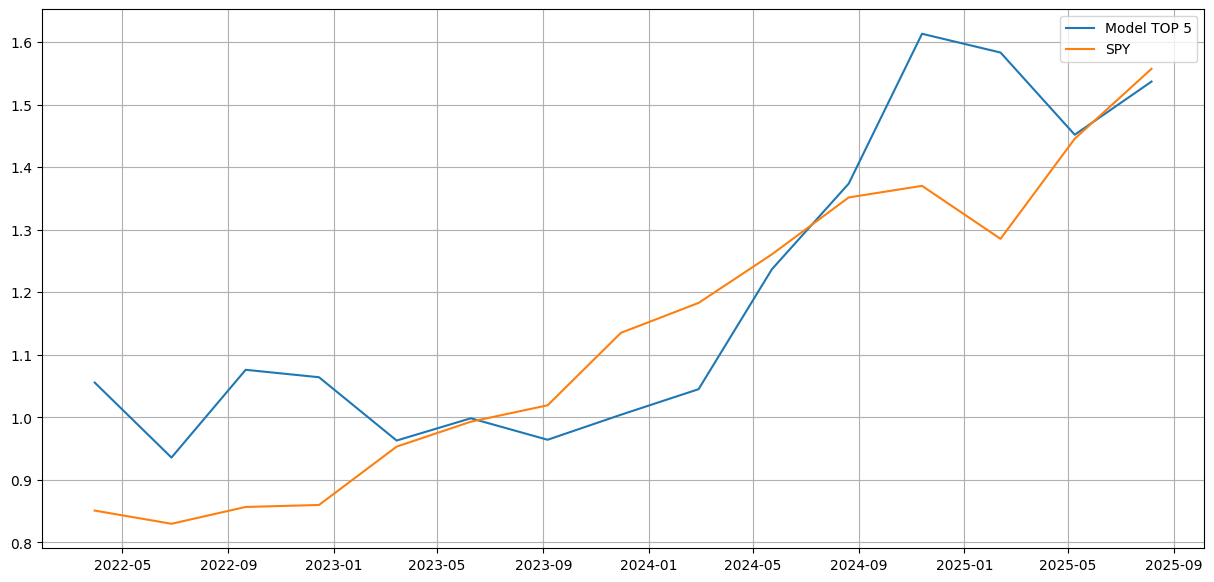

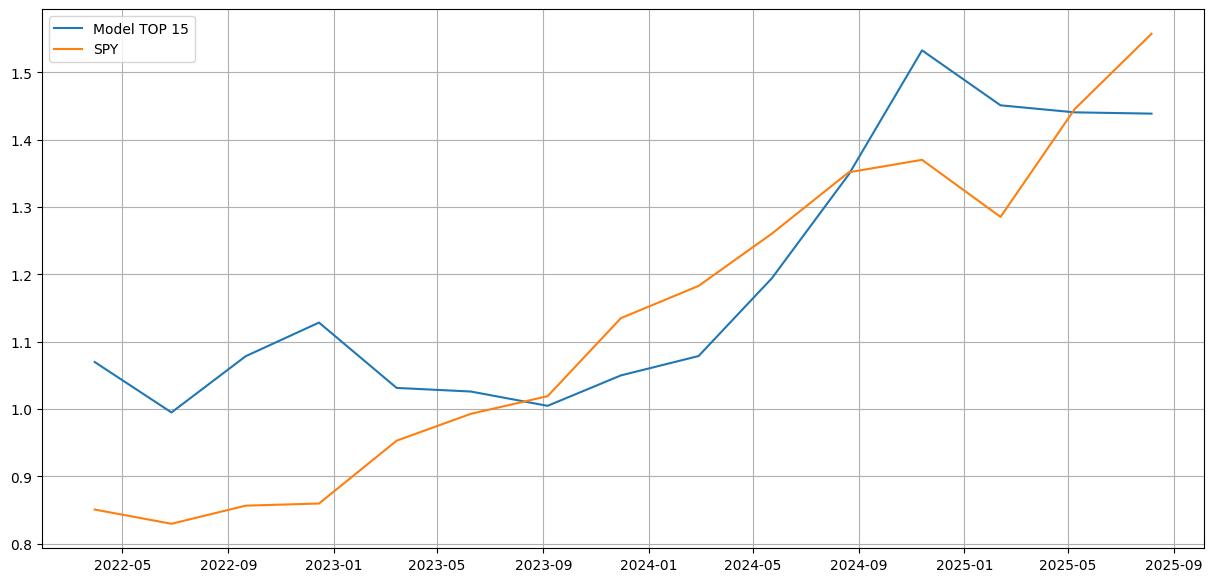

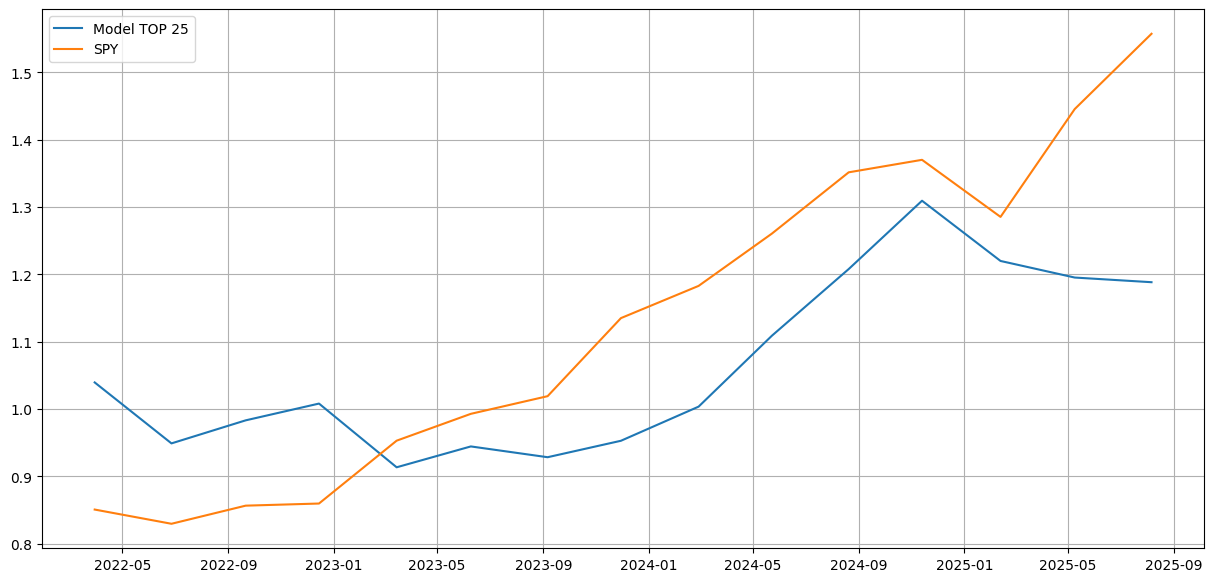

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# ============================================================
# CONFIG
# ============================================================
H = HORIZON               # holding period (e.g., 60 days)
BACKTEST_START = "2022-01-01"
TOP_predictions = [5, 15, 25]

# Use the final retrained predictions
y_pred_final = rank_pred_test_all

THREAD_SHARPE = {}
THREAD_RETURN = {}
THREAD_MAXDD  = {}
THREAD_FINAL  = {}

# ============================================================
# METRICS
# ============================================================
def sharpe_ratio(r):
    r = np.array(r)
    return r.mean() / (r.std() + 1e-12) if len(r) > 1 else np.nan

def max_drawdown(cum):
    peak = np.maximum.accumulate(cum)
    dd = (cum - peak) / peak
    return dd.min()

# ============================================================
# SPY RETURNS OVER H (buy at t0, sell at t0+H)
# ============================================================
spy = yf.download("SPY", start="1990-01-01", progress=False, auto_adjust=True)

# safe Close extraction
if isinstance(spy.columns, pd.MultiIndex):
    close = spy["Close"].iloc[:,0]
else:
    close = spy["Close"]

spy = pd.DataFrame({"Close": close})
spy["future"] = spy["Close"].shift(-H)
spy["ret"] = (spy["future"] - spy["Close"]) / spy["Close"]

# ============================================================
# MODEL REALIZED RETURNS (BUY at t0, SELL at t0+H)
# ============================================================
back_returns = []

for idx in range(len(dates_test)):
    d = dates_test[idx]
    sid = ids_test[idx]
    ticker = tickers[sid]

    series = extract_price(all_data[ticker], ticker)

    if d not in series.index:
        back_returns.append(np.nan)
        continue

    ix = series.index.get_loc(d)
    if ix + H >= len(series):
        back_returns.append(np.nan)
        continue
    
    p0 = series.iloc[ix]
    pH = series.iloc[ix + H]

    back_returns.append((pH - p0) / p0)

back_returns = np.array(back_returns)

# ============================================================
# BACKTEST FUNCTION — Approach A (correct)
# ============================================================
def run_backtest(TOP_K):

    df = pd.DataFrame({
        "date": dates_test,
        "stock_id": ids_test,
        "y_pred": y_pred_final,
        "true_return_forward": back_returns
    }).dropna()

    df["date"] = pd.to_datetime(df["date"])
    df = df[df["date"] >= pd.Timestamp(BACKTEST_START)]
    df = df.sort_values("date")

    unique_dates = df["date"].unique()

    port_dates = []
    port_rets  = []
    spy_rets   = []

    i = 0
    while i < len(unique_dates):
        t0 = unique_dates[i]
        idx0 = np.where(unique_dates == t0)[0][0]
        idx1 = idx0 + H

        if idx1 >= len(unique_dates):
            break

        t_sell = unique_dates[idx1]

        # pick top predicted stocks at t0
        df_t0 = df[df["date"] == t0].sort_values("y_pred", ascending=False).head(TOP_K)

        realized = df_t0["true_return_forward"].mean()

        port_dates.append(t_sell)
        port_rets.append(realized)

        # SPY benchmark
        if t_sell in spy.index:
            spy_rets.append(float(spy.loc[t_sell, "ret"]))
        else:
            spy_rets.append(np.nan)

        i += H

    df_port = pd.DataFrame({
        "date": port_dates,
        "model_return": port_rets,
        "spy_return": spy_rets
    }).dropna()

    df_port["cum_model"] = (1 + df_port["model_return"]).cumprod()
    df_port["cum_spy"]   = (1 + df_port["spy_return"]).cumprod()

    return df_port

# ============================================================
# MAIN BACKTEST FOR TOP_K = 5, 15, 25
# ============================================================
results = {}
metrics_table = []

for TOP_K in TOP_predictions:
    df_port = run_backtest(TOP_K)
    results[TOP_K] = df_port

    mr = df_port["model_return"].values
    sr = df_port["spy_return"].values

    metrics_table.append({
        "top_k": TOP_K,
        "model_mean_return": mr.mean(),
        "model_std_return": mr.std(),
        "model_sharpe": sharpe_ratio(mr),
        "model_max_drawdown": max_drawdown(df_port["cum_model"].values),
        "model_final_cum": df_port["cum_model"].iloc[-1],

        "spy_mean_return": sr.mean(),
        "spy_std_return": sr.std(),
        "spy_sharpe": sharpe_ratio(sr),
        "spy_max_drawdown": max_drawdown(df_port["cum_spy"].values),
        "spy_final_cum": df_port["cum_spy"].iloc[-1],
    })

metrics_df = pd.DataFrame(metrics_table)
print("\n===== MAIN BACKTEST METRICS =====")
print(metrics_df)

# ============================================================
# THREAD ANALYSIS — 60 OFFSETS (parallel independent strategies)
# ============================================================
df_daily = pd.DataFrame({
    "date": dates_test,
    "stock_id": ids_test,
    "y_pred": y_pred_final,
    "true_return_forward": back_returns
}).dropna()

df_daily["date"] = pd.to_datetime(df_daily["date"])
df_daily = df_daily.sort_values(["date","y_pred"], ascending=[True,False])
u_dates = df_daily["date"].unique()

for TOP_K in TOP_predictions:

    returns_list = []
    sharpe_list  = []
    maxdd_list   = []
    final_list   = []

    for offset in range(H):

        q = []
        i = offset
        while i < len(u_dates):
            t0 = u_dates[i]
            idx1 = i + H
            if idx1 >= len(u_dates):
                break

            df_t0 = df_daily[df_daily["date"] == t0].sort_values("y_pred", ascending=False).head(TOP_K)

            q.append(float(df_t0["true_return_forward"].mean()))
            i += H

        q = np.array(q)

        if len(q) == 0:
            returns_list.append(np.nan)
            sharpe_list.append(np.nan)
            maxdd_list.append(np.nan)
            final_list.append(np.nan)
            continue

        returns_list.append(q.mean())
        sharpe_list.append(sharpe_ratio(q))

        cum = (1 + q).cumprod()
        maxdd_list.append(max_drawdown(cum))
        final_list.append(cum[-1])

    THREAD_RETURN[TOP_K] = np.array(returns_list)
    THREAD_SHARPE[TOP_K] = np.array(sharpe_list)
    THREAD_MAXDD[TOP_K]  = np.array(maxdd_list)
    THREAD_FINAL[TOP_K]  = np.array(final_list)

    # save into metrics_df
    metrics_df.loc[metrics_df["top_k"] == TOP_K, "thread_return_mean"] = np.nanmean(THREAD_RETURN[TOP_K])
    metrics_df.loc[metrics_df["top_k"] == TOP_K, "thread_return_std"]  = np.nanstd(THREAD_RETURN[TOP_K])

    metrics_df.loc[metrics_df["top_k"] == TOP_K, "thread_sharpe_mean"] = np.nanmean(THREAD_SHARPE[TOP_K])
    metrics_df.loc[metrics_df["top_k"] == TOP_K, "thread_sharpe_std"]  = np.nanstd(THREAD_SHARPE[TOP_K])

    metrics_df.loc[metrics_df["top_k"] == TOP_K, "thread_maxdd_worst"] = np.nanmin(THREAD_MAXDD[TOP_K])
    metrics_df.loc[metrics_df["top_k"] == TOP_K, "thread_finalcum_mean"] = np.nanmean(THREAD_FINAL[TOP_K])

print("\n===== THREAD SUMMARY ADDED =====")
print(metrics_df)

# ============================================================
# PLOTS — MODEL vs SPY
# ============================================================
for TOP_K in TOP_predictions:
    df_port = results[TOP_K]
    plt.figure(figsize=(15,7))
    plt.plot(df_port["date"], df_port["cum_model"], label=f"Model TOP {TOP_K}")
    plt.plot(df_port["date"], df_port["cum_spy"],   label="SPY")
    plt.grid(True)
    plt.legend()
    plt.show()

# Save tables
metrics_df.to_csv("model_comparison_v01.csv", index=False)
metrics_df.to_json("model_comparison_v01.json", orient="records")


C:\Users\benna435\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 216s 308ms/step - loss: 0.0829 - mae: 0.2489 - val_loss: 0.0834 - val_mae: 0.2501 - learning_rate: 0.0010
Epoch 2/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 216s 311ms/step - loss: 0.0825 - mae: 0.2486 - val_loss: 0.0836 - val_mae: 0.2503 - learning_rate: 0.0010
Epoch 3/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 218s 314ms/step - loss: 0.0825 - mae: 0.2485 - val_loss: 0.0834 - val_mae: 0.2501 - learning_rate: 0.0010
Epoch 4/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 215s 310ms/step - loss: 0.0825 - mae: 0.2485 - val_loss: 0.0835 - val_mae: 0.2502 - learning_rate: 5.0000e-04
Epoch 5/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 216s 311ms/step - loss: 0.0825 - mae: 0.2485 - val_loss: 0.0836 - val_mae: 0.2502 - learning_rate: 5.0000e-04
Epoch 6/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 218s 314ms/step - loss: 0.0825 - mae: 0.2485 - val_loss: 0.0836 - val_mae: 0.2502 - learning_rate: 2.5000e-04
Epoch 7/40
693/693 ━━━━━━━━━━━━━━━━━━━━ 216s 312ms/step - loss: 0.0825 - mae: 0.2485 - val_loss: 0.0835 - val_ma

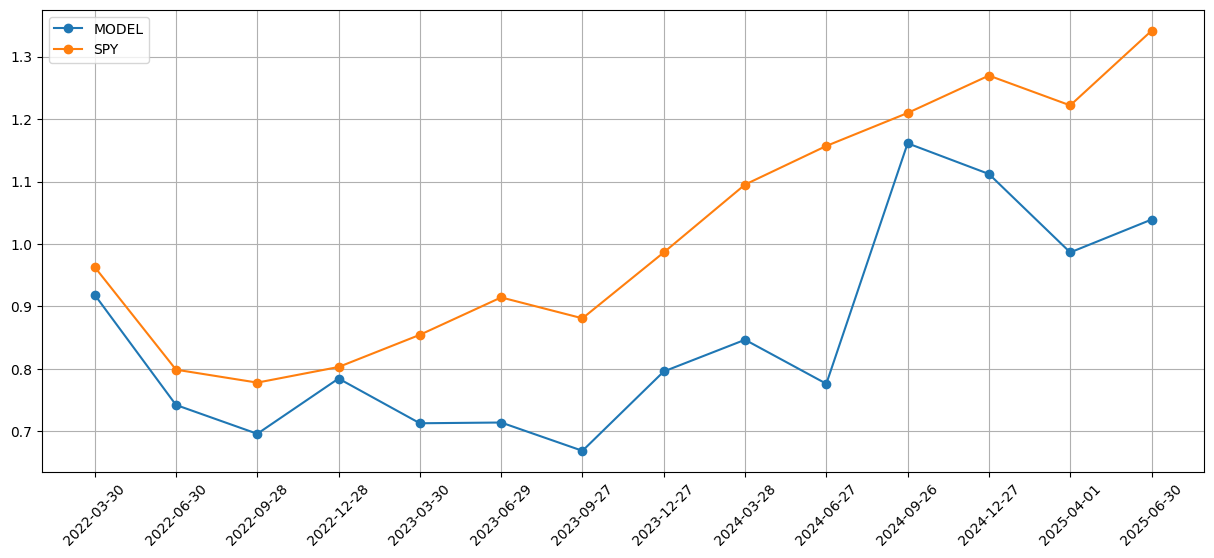

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ======================================================
# MODEL BUILDER
# ======================================================
def build_model():
    model = Sequential([
        LSTM(64, input_shape=(WINDOW,1)),
        Dropout(0.30),
        Dense(32, activation='relu'),
        Dropout(0.20),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss="mse",
        metrics=["mae"]
    )
    return model

# ======================================================
# CONFIG
# ======================================================
H = HORIZON
TOP_K = 15

# same cutoff dates as before
cutoffs = [
    "2022-1-1","2022-4-1","2022-7-1","2022-10-1",
    "2023-1-1","2023-4-1","2023-7-1","2023-10-1",
    "2024-1-1","2024-4-1","2024-7-1","2024-10-1",
    "2025-1-1","2025-4-1"
]

# validation window length (match your main model)
VALID_YEARS = 5  # 2017–2022 ≈ 5 years

rolling_results = []

# ======================================================
# METRICS
# ======================================================
def sharpe_ratio(r):
    r = np.array(r)
    return r.mean() / (r.std() + 1e-12) if len(r)>1 else np.nan

def max_drawdown(cum_curve):
    peak = np.maximum.accumulate(cum_curve)
    return ((cum_curve - peak) / peak).min()

def volatility(r):
    return np.std(r)

def max_losing_streak(r):
    streak = 0
    worst = 0
    for x in r:
        if x < 0:
            streak += 1
            worst = max(worst, streak)
        else:
            streak = 0
    return worst

# ======================================================
# SPY DATA
# ======================================================
spy = yf.download("SPY", start="1990-01-01", progress=False, auto_adjust=True)

if isinstance(spy.columns, pd.MultiIndex):
    spy_close = spy["Close"].iloc[:,0]
else:
    spy_close = spy["Close"]

spy = pd.DataFrame({"Close": spy_close})
spy["prev"] = spy["Close"].shift(H)
spy["ret"] = (spy["Close"] - spy["prev"]) / spy["prev"]


# ======================================================
# MAIN ROLLING LOOP
# ======================================================
for cutoff in cutoffs:

    cutoff_date = pd.Timestamp(cutoff)

    # ======================================================
    # VALIDATION WINDOW MATCHING MAIN MODEL
    # ======================================================
    val_start = cutoff_date - pd.DateOffset(years=VALID_YEARS)

    val_mask = (dates_pd < cutoff_date) & (dates_pd >= val_start)
    train_mask = (dates_pd < val_start)
    train_mask_full = (dates_pd < cutoff_date)

    # ======================================================
    # FIRST TRAINING: validation to find best epoch
    # ======================================================
    model = build_model()
    early_stop = EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)
    lr_sched = ReduceLROnPlateau(monitor="val_loss", patience=2, factor=0.5, min_lr=1e-5)

    history = model.fit(
        X[train_mask], y_rank[train_mask],
        validation_data=(X[val_mask], y_rank[val_mask]),
        epochs=40,
        batch_size=2048,
        callbacks=[early_stop, lr_sched],
        verbose=1
    )

    best_epoch = np.argmin(history.history["val_loss"]) + 1
    best_lr = float(tf.keras.backend.get_value(model.optimizer.learning_rate))

    # ======================================================
    # SECOND TRAINING: retrain on ALL < cutoff
    # ======================================================
    model_all = build_model()

    # REPLACE THE LEARNING RATE PROPERLY
    opt = tf.keras.optimizers.Adam(learning_rate=best_lr)
    model_all.compile(optimizer=opt, loss="mse", metrics=["mae"])

    model_all.fit(
        X[train_mask_full], y_rank[train_mask_full],
        epochs=best_epoch,
        batch_size=2048,
        verbose=1
    )


    # ======================================================
    # Determine test date = first date AFTER cutoff
    # ======================================================
    test_mask_single = dates_pd == (cutoff_date + pd.Timedelta(days=1))

    if test_mask_single.sum() == 0:
        nearest_after = dates_pd[dates_pd > cutoff_date].min()
        test_mask_single = (dates_pd == nearest_after)
        test_date = nearest_after
    else:
        test_date = cutoff_date + pd.Timedelta(days=1)

    # ======================================================
    # Predict at t0
    # ======================================================
    pred = model_all.predict(X[test_mask_single]).reshape(-1)
    ids_pred = stock_ids[test_mask_single]
    dates_pred = dates_pd[test_mask_single]

    df_pred = pd.DataFrame({
        "date": dates_pred,
        "id": ids_pred,
        "rank": pred,
        "true_return": y[test_mask_single]
    }).sort_values("rank", ascending=False).head(TOP_K)

    realized_return = df_pred["true_return"].mean()

    # ======================================================
    # Realized date = t0 + H
    # ======================================================
    if test_date in spy.index:
        idx0 = spy.index.get_loc(test_date)
        idx1 = idx0 + H
        realized_date = spy.index[idx1] if idx1 < len(spy) else test_date
    else:
        realized_date = test_date

    # ======================================================
    # SPY return at realized date
    # ======================================================
    if realized_date in spy.index:
        spy_ret = float(spy.loc[realized_date, "ret"])
    else:
        spy_ret = np.nan

    rolling_results.append({
        "cutoff": cutoff,
        "date_pred": str(realized_date.date()),
        "model_return": realized_return,
        "spy_return": spy_ret
    })

# ======================================================
# BUILD RESULTS
# ======================================================
df_roll = pd.DataFrame(rolling_results)
df_roll["cum_model"] = (1 + df_roll["model_return"]).cumprod()
df_roll["cum_spy"] = (1 + df_roll["spy_return"]).cumprod()

r_model = df_roll["model_return"].values
r_spy = df_roll["spy_return"].values

rolling_metrics = {
    "model_sharpe": sharpe_ratio(r_model),
    "model_total_return": df_roll["cum_model"].iloc[-1],
    "model_maxdrawdown": max_drawdown(df_roll["cum_model"].values),
    "model_volatility": volatility(r_model),
    "model_losing_streak": max_losing_streak(r_model),
    "spy_sharpe": sharpe_ratio(r_spy),
    "spy_total_return": df_roll["cum_spy"].iloc[-1],
    "spy_maxdrawdown": max_drawdown(df_roll["cum_spy"].values),
    "spy_volatility": volatility(r_spy),
    "spy_losing_streak": max_losing_streak(r_spy)
}

print("\n===== ROLLING TABLE =====\n", df_roll)
print("\n===== ROLLING METRICS =====")
for k,v in rolling_metrics.items():
    print(f"{k}: {v:.6f}")

plt.figure(figsize=(15,6))
plt.plot(df_roll["date_pred"], df_roll["cum_model"], marker="o", label="MODEL")
plt.plot(df_roll["date_pred"], df_roll["cum_spy"], marker="o", label="SPY")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# =====================================================================
# LOAD REQUIRED DATA + REBUILD VARIABLES FROM SCRIPT 1
# =====================================================================

# --- same config as training script ---
WINDOW  = 60          # or 30, match your main run
HORIZON = 60          # or 30, match your main run
EPS     = 1e-8

# --- all_data MUST be loaded here ---
# If you saved earlier, load it; else you must redefine how you load stocks.
# Example placeholder (REPLACE WITH YOUR REAL LOADING):
# all_data = np.load("all_data.npy", allow_pickle=True).item()
# If you originally defined all_data manually, paste that code here.

# --- universal price extractor (identical to script 1) ---
def extract_price(df, ticker):
    if isinstance(df.columns, pd.MultiIndex):
        level0 = df.columns.get_level_values(0)
        if "Close" in level0:
            close_cols = [c for c in df.columns if c[0] == "Close"]
            if len(close_cols) == 1:
                price = df[close_cols[0]]
            else:
                match = [c for c in close_cols if c[1] == ticker]
                price = df[match[0]] if len(match)==1 else df[close_cols[0]]
        else:
            price = df.iloc[:,0]
    else:
        if "Close" in df.columns:
            price = df["Close"]
        elif "Adj Close" in df.columns:
            price = df["Adj Close"]
        else:
            price = df.iloc[:,0]
    return price.rename("price").dropna()

# --- rebuild tickers and ids ---
tickers = list(all_data.keys())
ticker_to_id = {t: i for i, t in enumerate(tickers)}

# =====================================================================
# REBUILD RAW X, y, stock_ids, dates
# =====================================================================
X_list, y_list, ids_list, dates_list = [], [], [], []

for t in tickers:
    price = extract_price(all_data[t], t)
    prices = price.values
    dates  = price.index
    
    max_i = len(prices) - (WINDOW + HORIZON + 1)
    if max_i < 0:
        continue
    
    for i in range(max_i + 1):
        window = prices[i : i + WINDOW]
        current_price = prices[i + WINDOW - 1]
        future_price  = prices[i + WINDOW + HORIZON]
        future_return = (future_price - current_price) / (current_price + EPS)

        X_list.append(window)
        y_list.append(future_return)
        ids_list.append(ticker_to_id[t])
        dates_list.append(dates[i + WINDOW])

X = np.array(X_list)
y = np.array(y_list)
stock_ids = np.array(ids_list)
dates_arr = np.array(dates_list)

# --- rank returns per date (same as training script) ---
df_tmp = pd.DataFrame({"date": dates_arr, "y": y})
df_tmp["rank"] = df_tmp.groupby("date")["y"].rank(method="dense", pct=True)
y_rank = df_tmp["rank"].values.astype(np.float32)

# --- convert dates to pandas datetime ---
dates_pd = pd.to_datetime(dates_arr)

# --- normalize windows ---
def normalize_window(w):
    mu = w.mean()
    sd = w.std() + 1e-6
    return (w - mu) / sd

X = np.array([normalize_window(w) for w in X])

# --- reshape for LSTM ---
X = X[..., None]

# ======================================================
# MODEL BUILDER
# ======================================================
def build_model():
    model = Sequential([
        LSTM(64, input_shape=(WINDOW,1)),
        Dropout(0.30),
        Dense(32, activation='relu'),
        Dropout(0.20),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss="mse",
        metrics=["mae"]
    )
    return model

# ======================================================
# CONFIG
# ======================================================
H = HORIZON
TOP_K = 15

# same cutoff dates as before
cutoffs = [
    "2022-1-1"#,"2022-4-1","2022-7-1","2022-10-1"
]

# validation window length (match your main model)
VALID_YEARS = 5  # 2017–2022 ≈ 5 years

rolling_results = []

# ======================================================
# METRICS
# ======================================================
def sharpe_ratio(r):
    r = np.array(r)
    return r.mean() / (r.std() + 1e-12) if len(r)>1 else np.nan

def max_drawdown(cum_curve):
    peak = np.maximum.accumulate(cum_curve)
    return ((cum_curve - peak) / peak).min()

def volatility(r):
    return np.std(r)

def max_losing_streak(r):
    streak = 0
    worst = 0
    for x in r:
        if x < 0:
            streak += 1
            worst = max(worst, streak)
        else:
            streak = 0
    return worst

# ======================================================
# SPY DATA
# ======================================================
spy = yf.download("SPY", start="1990-01-01", progress=False, auto_adjust=True)

if isinstance(spy.columns, pd.MultiIndex):
    spy_close = spy["Close"].iloc[:,0]
else:
    spy_close = spy["Close"]

spy = pd.DataFrame({"Close": spy_close})
spy["prev"] = spy["Close"].shift(H)
spy["ret"] = (spy["Close"] - spy["prev"]) / spy["prev"]


# ======================================================
# MAIN ROLLING LOOP
# ======================================================
for cutoff in cutoffs:

    cutoff_date = pd.Timestamp(cutoff)

    # ======================================================
    # VALIDATION WINDOW MATCHING MAIN MODEL
    # ======================================================
    val_start = cutoff_date - pd.DateOffset(years=VALID_YEARS)

    val_mask = (dates_pd < cutoff_date) & (dates_pd >= val_start)
    train_mask = (dates_pd < val_start)
    train_mask_full = (dates_pd < cutoff_date)

    # ======================================================
    # FIRST TRAINING: validation to find best epoch
    # ======================================================
    model = build_model()
    early_stop = EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)
    lr_sched = ReduceLROnPlateau(monitor="val_loss", patience=2, factor=0.5, min_lr=1e-5)

    history = model.fit(
        X[train_mask], y_rank[train_mask],
        validation_data=(X[val_mask], y_rank[val_mask]),
        epochs=40,
        batch_size=2048,
        callbacks=[early_stop, lr_sched],
        verbose=1
    )

    best_epoch = np.argmin(history.history["val_loss"]) + 1
    best_lr = float(tf.keras.backend.get_value(model.optimizer.learning_rate))

    # ======================================================
    # SECOND TRAINING: retrain on ALL < cutoff
    # ======================================================
    model_all = build_model()

    # REPLACE THE LEARNING RATE PROPERLY
    opt = tf.keras.optimizers.Adam(learning_rate=best_lr)
    model_all.compile(optimizer=opt, loss="mse", metrics=["mae"])

    model_all.fit(
        X[train_mask_full], y_rank[train_mask_full],
        epochs=best_epoch,
        batch_size=2048,
        verbose=1
    )


    # ======================================================
    # Determine test date = first date AFTER cutoff
    # ======================================================
    test_mask_single = dates_pd == (cutoff_date + pd.Timedelta(days=1))

    if test_mask_single.sum() == 0:
        nearest_after = dates_pd[dates_pd > cutoff_date].min()
        test_mask_single = (dates_pd == nearest_after)
        test_date = nearest_after
    else:
        test_date = cutoff_date + pd.Timedelta(days=1)

    # ======================================================
    # Predict at t0
    # ======================================================
    pred = model_all.predict(X[test_mask_single]).reshape(-1)
    ids_pred = stock_ids[test_mask_single]
    dates_pred = dates_pd[test_mask_single]

    df_pred = pd.DataFrame({
        "date": dates_pred,
        "id": ids_pred,
        "rank": pred,
        "true_return": y[test_mask_single]
    }).sort_values("rank", ascending=False).head(TOP_K)

    realized_return = df_pred["true_return"].mean()

    # ======================================================
    # Realized date = t0 + H
    # ======================================================
    if test_date in spy.index:
        idx0 = spy.index.get_loc(test_date)
        idx1 = idx0 + H
        realized_date = spy.index[idx1] if idx1 < len(spy) else test_date
    else:
        realized_date = test_date

    # ======================================================
    # SPY return at realized date
    # ======================================================
    if realized_date in spy.index:
        spy_ret = float(spy.loc[realized_date, "ret"])
    else:
        spy_ret = np.nan

    rolling_results.append({
        "cutoff": cutoff,
        "date_pred": str(realized_date.date()),
        "model_return": realized_return,
        "spy_return": spy_ret
    })

# ======================================================
# BUILD RESULTS
# ======================================================
df_roll = pd.DataFrame(rolling_results)
df_roll["cum_model"] = (1 + df_roll["model_return"]).cumprod()
df_roll["cum_spy"] = (1 + df_roll["spy_return"]).cumprod()

r_model = df_roll["model_return"].values
r_spy = df_roll["spy_return"].values

rolling_metrics = {
    "model_sharpe": sharpe_ratio(r_model),
    "model_total_return": df_roll["cum_model"].iloc[-1],
    "model_maxdrawdown": max_drawdown(df_roll["cum_model"].values),
    "model_volatility": volatility(r_model),
    "model_losing_streak": max_losing_streak(r_model),
    "spy_sharpe": sharpe_ratio(r_spy),
    "spy_total_return": df_roll["cum_spy"].iloc[-1],
    "spy_maxdrawdown": max_drawdown(df_roll["cum_spy"].values),
    "spy_volatility": volatility(r_spy),
    "spy_losing_streak": max_losing_streak(r_spy)
}

print("\n===== ROLLING TABLE =====\n", df_roll)
print("\n===== ROLLING METRICS =====")
for k,v in rolling_metrics.items():
    print(f"{k}: {v:.6f}")

plt.figure(figsize=(15,6))
plt.plot(df_roll["date_pred"], df_roll["cum_model"], marker="o", label="MODEL")
plt.plot(df_roll["date_pred"], df_roll["cum_spy"], marker="o", label="SPY")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


C:\Users\benna435\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
311/693 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - loss: 0.0835 - mae: 0.2502